In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('full_to25.csv')

In [3]:
df['parsed_params'] = df['params'].apply(lambda x: eval(x))
df['mel_center'] = df['parsed_params'].apply(lambda x: x.get('mel_center'))
df['mel_n_fft'] = df['parsed_params'].apply(lambda x: x.get('mel_n_fft'))
df['mel_n_mfcc'] = df['parsed_params'].apply(lambda x: x.get('mel_n_mfcc'))
df['model_dropout'] = df['parsed_params'].apply(lambda x: x.get('model_dropout'))
df['model_hidden_size'] = df['parsed_params'].apply(lambda x: x.get('model_hidden_size'))
df['model_num_layers'] = df['parsed_params'].apply(lambda x: x.get('model_num_layers'))
df['opt_lr'] = df['parsed_params'].apply(lambda x: x.get('opt_lr'))
df['scheduler_step_size'] = df['parsed_params'].apply(lambda x: x.get('scheduler_step_size'))
df['scheduler_gamma'] = df['parsed_params'].apply(lambda x: x.get('scheduler_gamma'))


In [4]:
print(df['mel_center'].value_counts())
print(df['mel_n_fft'].value_counts())
print(df['mel_center'].value_counts())
print(df['mel_n_mfcc'].value_counts())
print(df['model_dropout'].value_counts())
print(df['model_hidden_size'].value_counts())
print(df['model_num_layers'].value_counts())
print(df['opt_lr'].value_counts())
print(df['scheduler_step_size'].value_counts())
print(df['scheduler_gamma'].value_counts())

mel_center
False    306
Name: count, dtype: int64
mel_n_fft
200    306
Name: count, dtype: int64
mel_center
False    306
Name: count, dtype: int64
mel_n_mfcc
8    306
Name: count, dtype: int64
model_dropout
0.3    306
Name: count, dtype: int64
model_hidden_size
1024    306
Name: count, dtype: int64
model_num_layers
2    306
Name: count, dtype: int64
opt_lr
0.0005    102
0.0008    102
0.0010    102
Name: count, dtype: int64
scheduler_step_size
5    306
Name: count, dtype: int64
scheduler_gamma
0.5    153
0.7    153
Name: count, dtype: int64


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(1)

params  epoch  train_correct  \
0  {'mel_center': False, 'mel_n_fft': 200, 'mel_n...      1          18485   

   test_correct                                      parsed_params  \
0          2280  {'mel_center': False, 'mel_n_fft': 200, 'mel_n...   

   mel_center  mel_n_fft  mel_n_mfcc  model_dropout  model_hidden_size  \
0       False        200           8            0.3               1024   

   model_num_layers  opt_lr  scheduler_step_size  scheduler_gamma  
0                 2  0.0005                    5              0.5

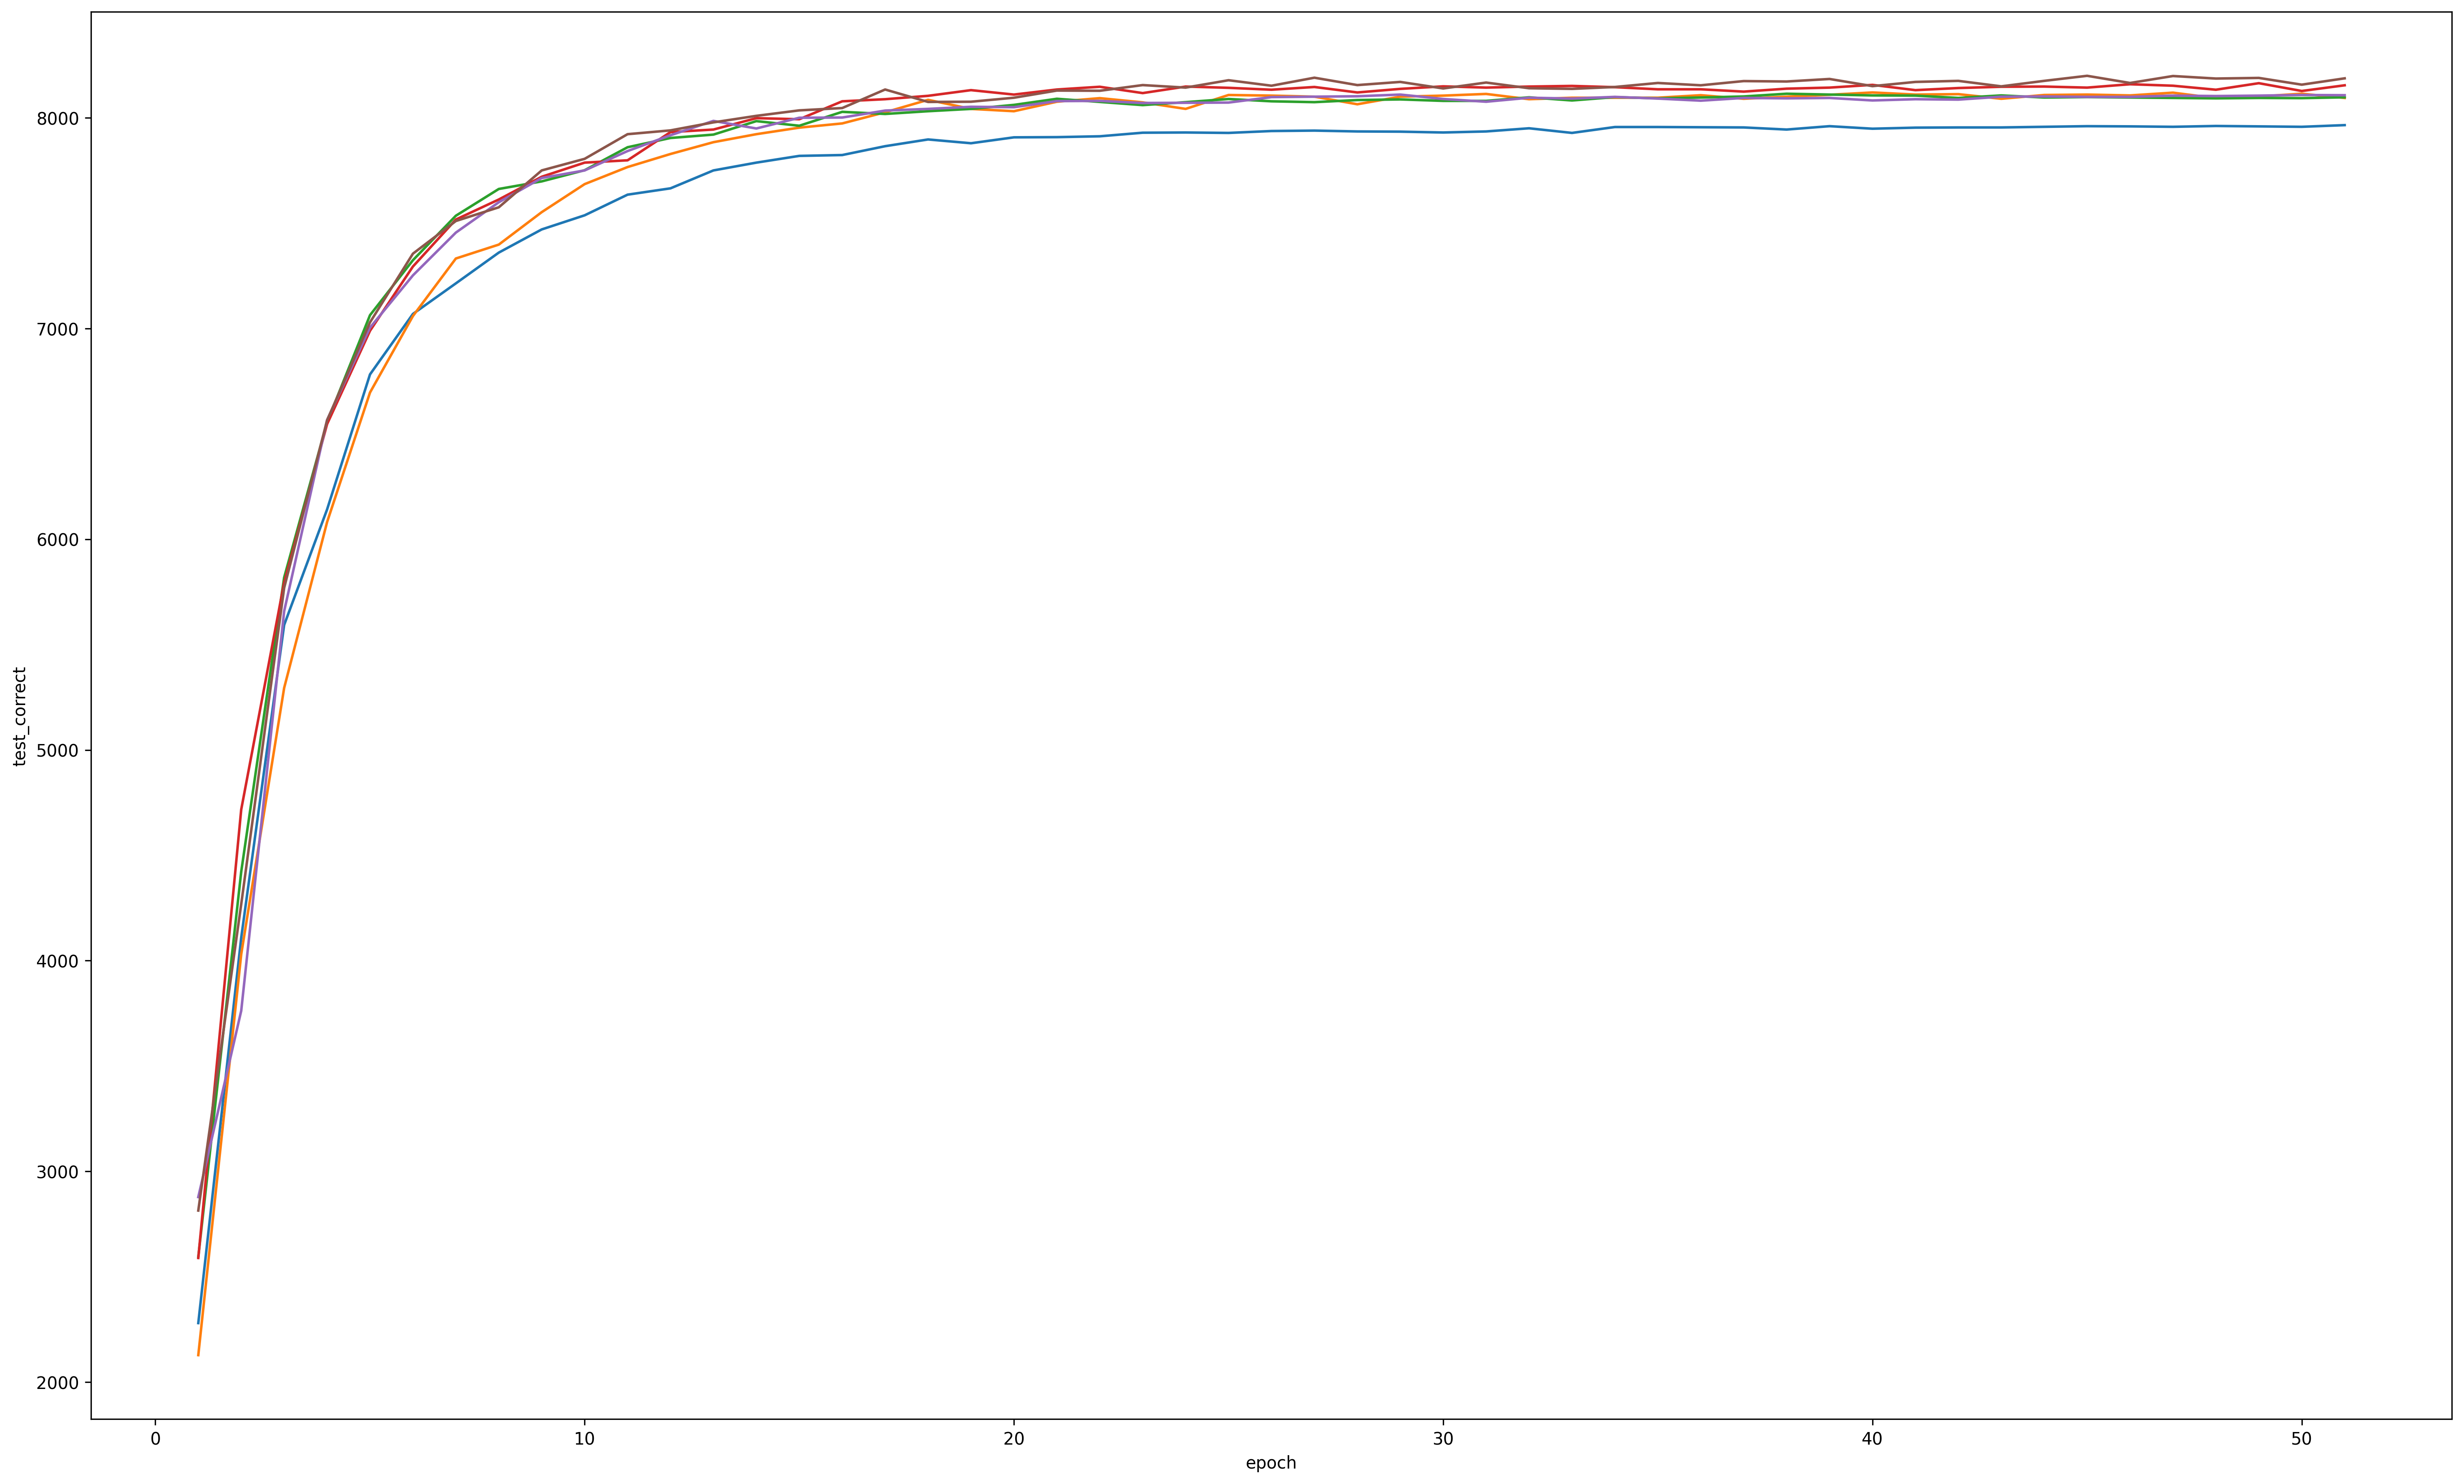

In [6]:
plt.figure(figsize=(25, 15), dpi=300) 
sns.lineplot(x=df['epoch'],y=df['test_correct'],hue=df['params'],legend=None)
plt.show()

In [7]:
best_params = df[df['test_correct']>8000]['params'].values
df_best = df[df['params'].isin(best_params)]

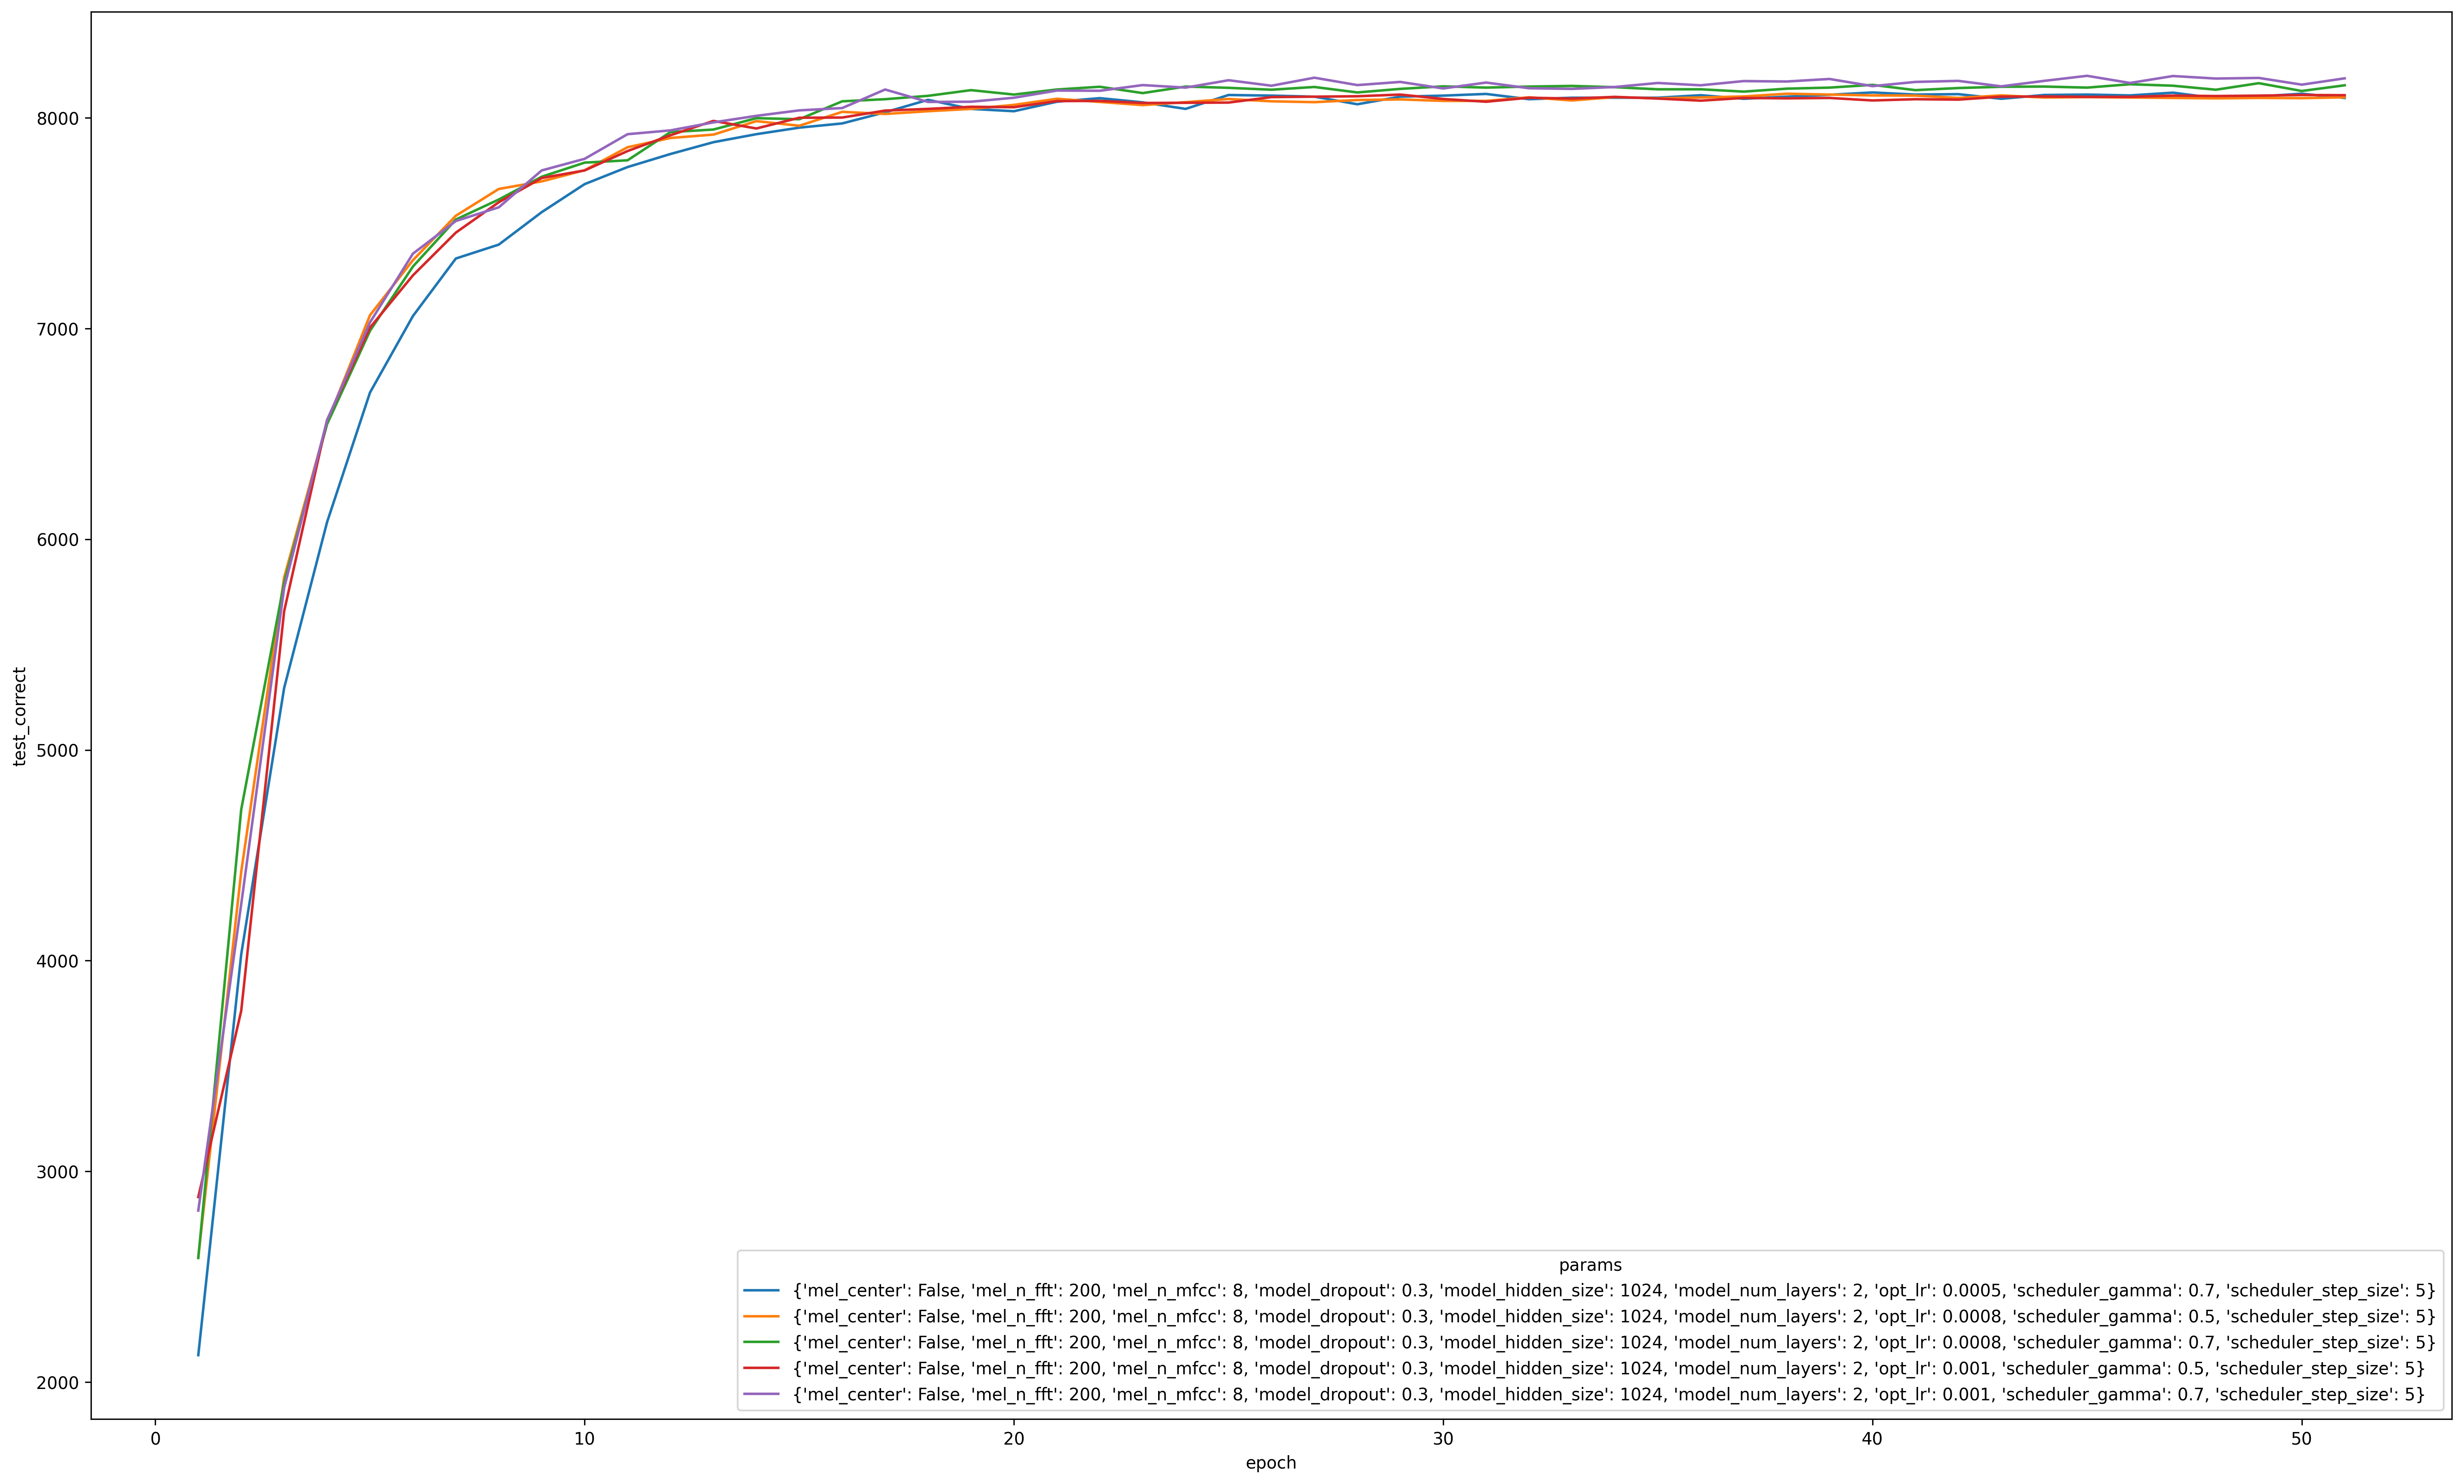

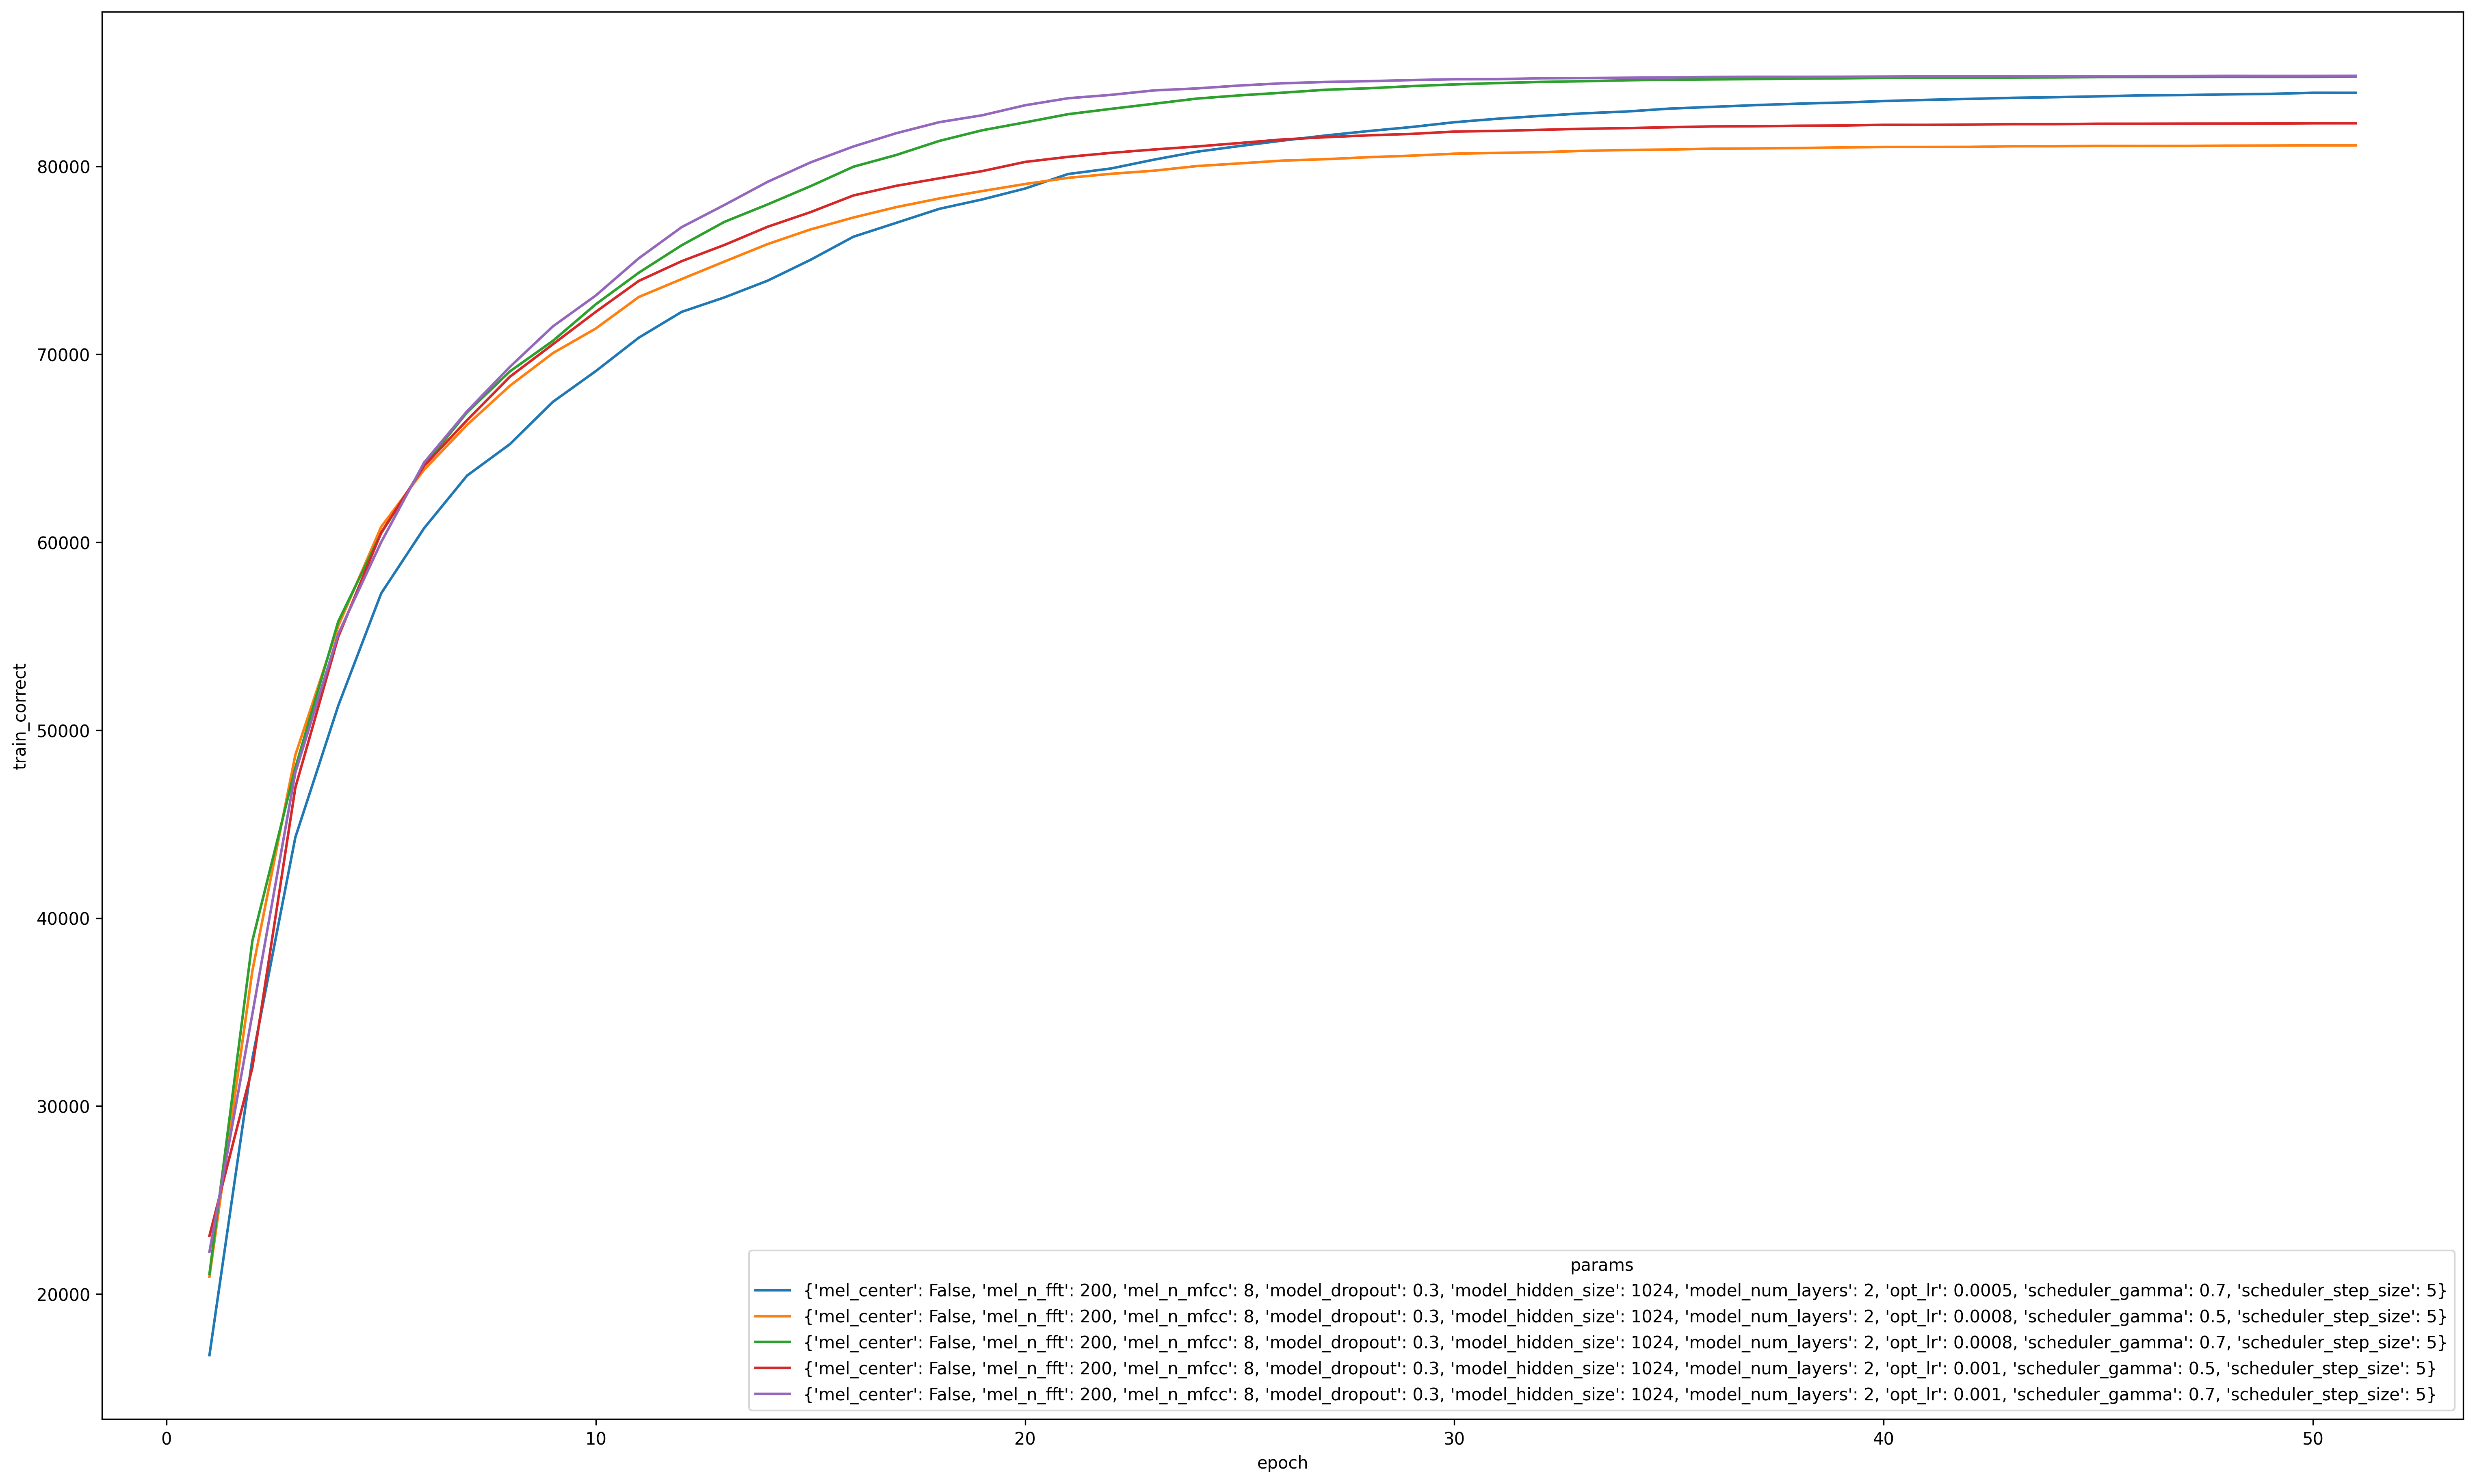

In [8]:
plt.figure(figsize=(25, 15), dpi=300) 
sns.lineplot(x=df_best['epoch'],y=df_best['test_correct'],hue=df_best['params'])
plt.show()
plt.figure(figsize=(25, 15), dpi=300) 
sns.lineplot(x=df_best['epoch'],y=df_best['train_correct'],hue=df_best['params'])
plt.show()

In [9]:
df_filt = df[df['opt_lr']==0.0005]

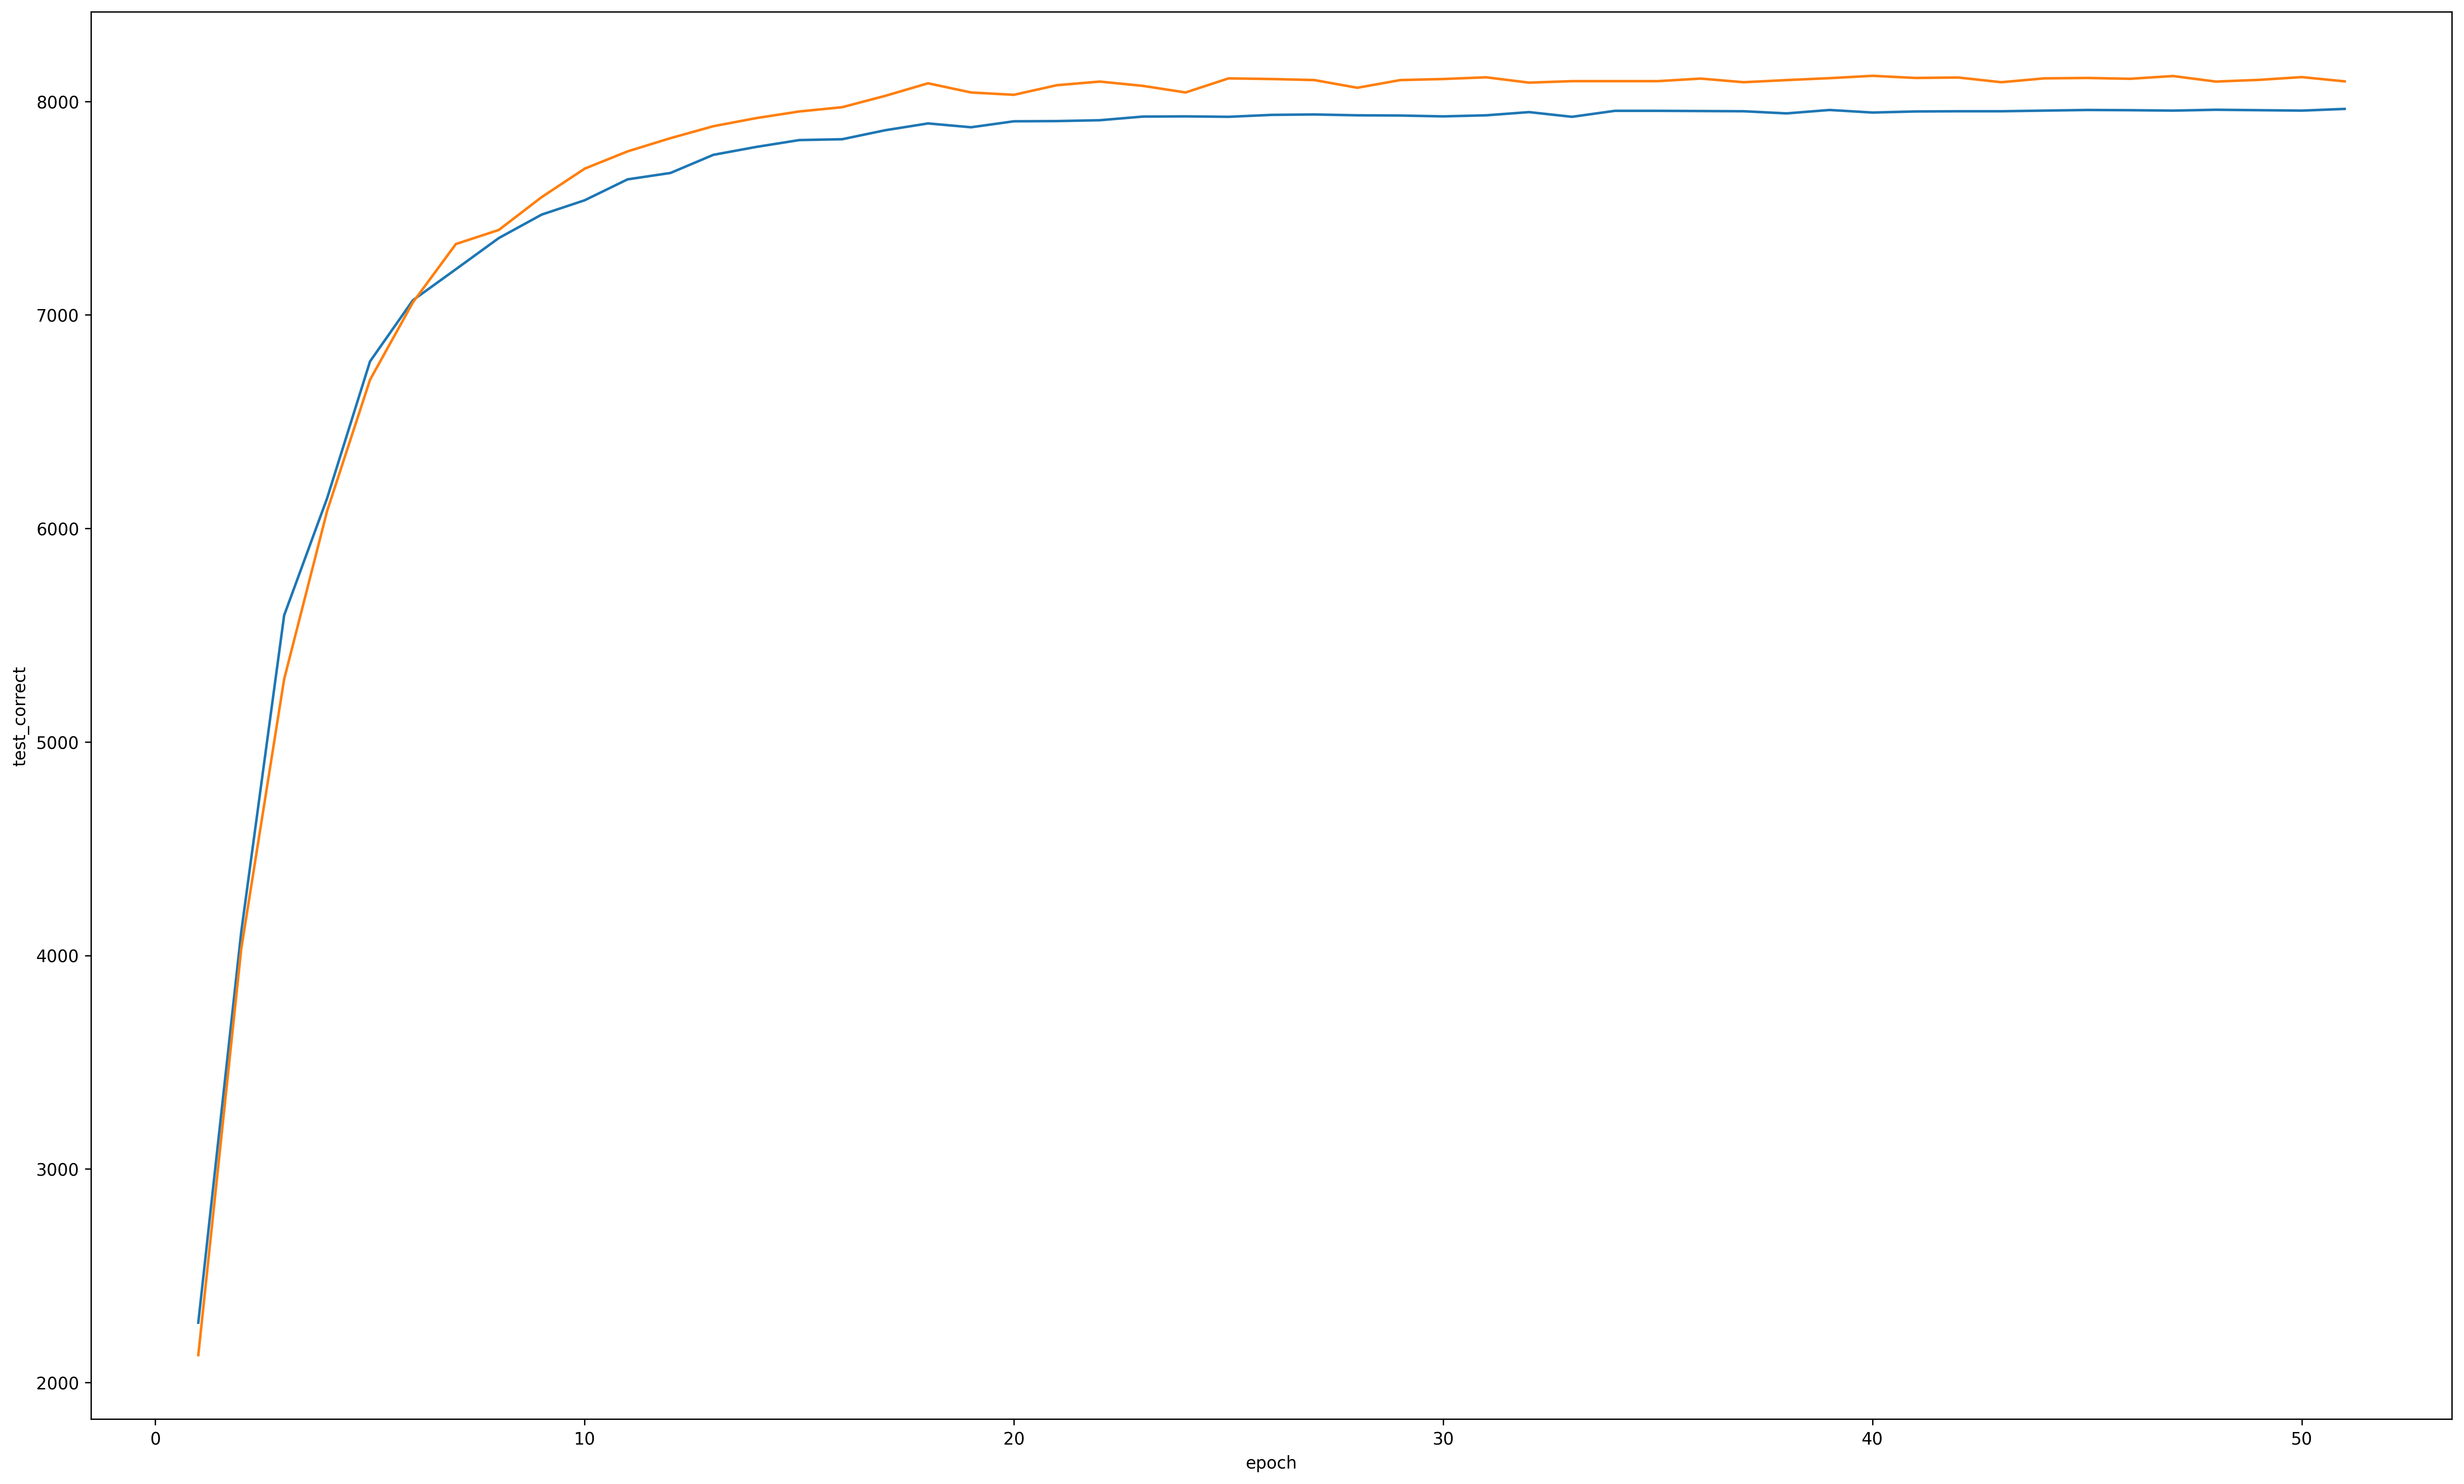

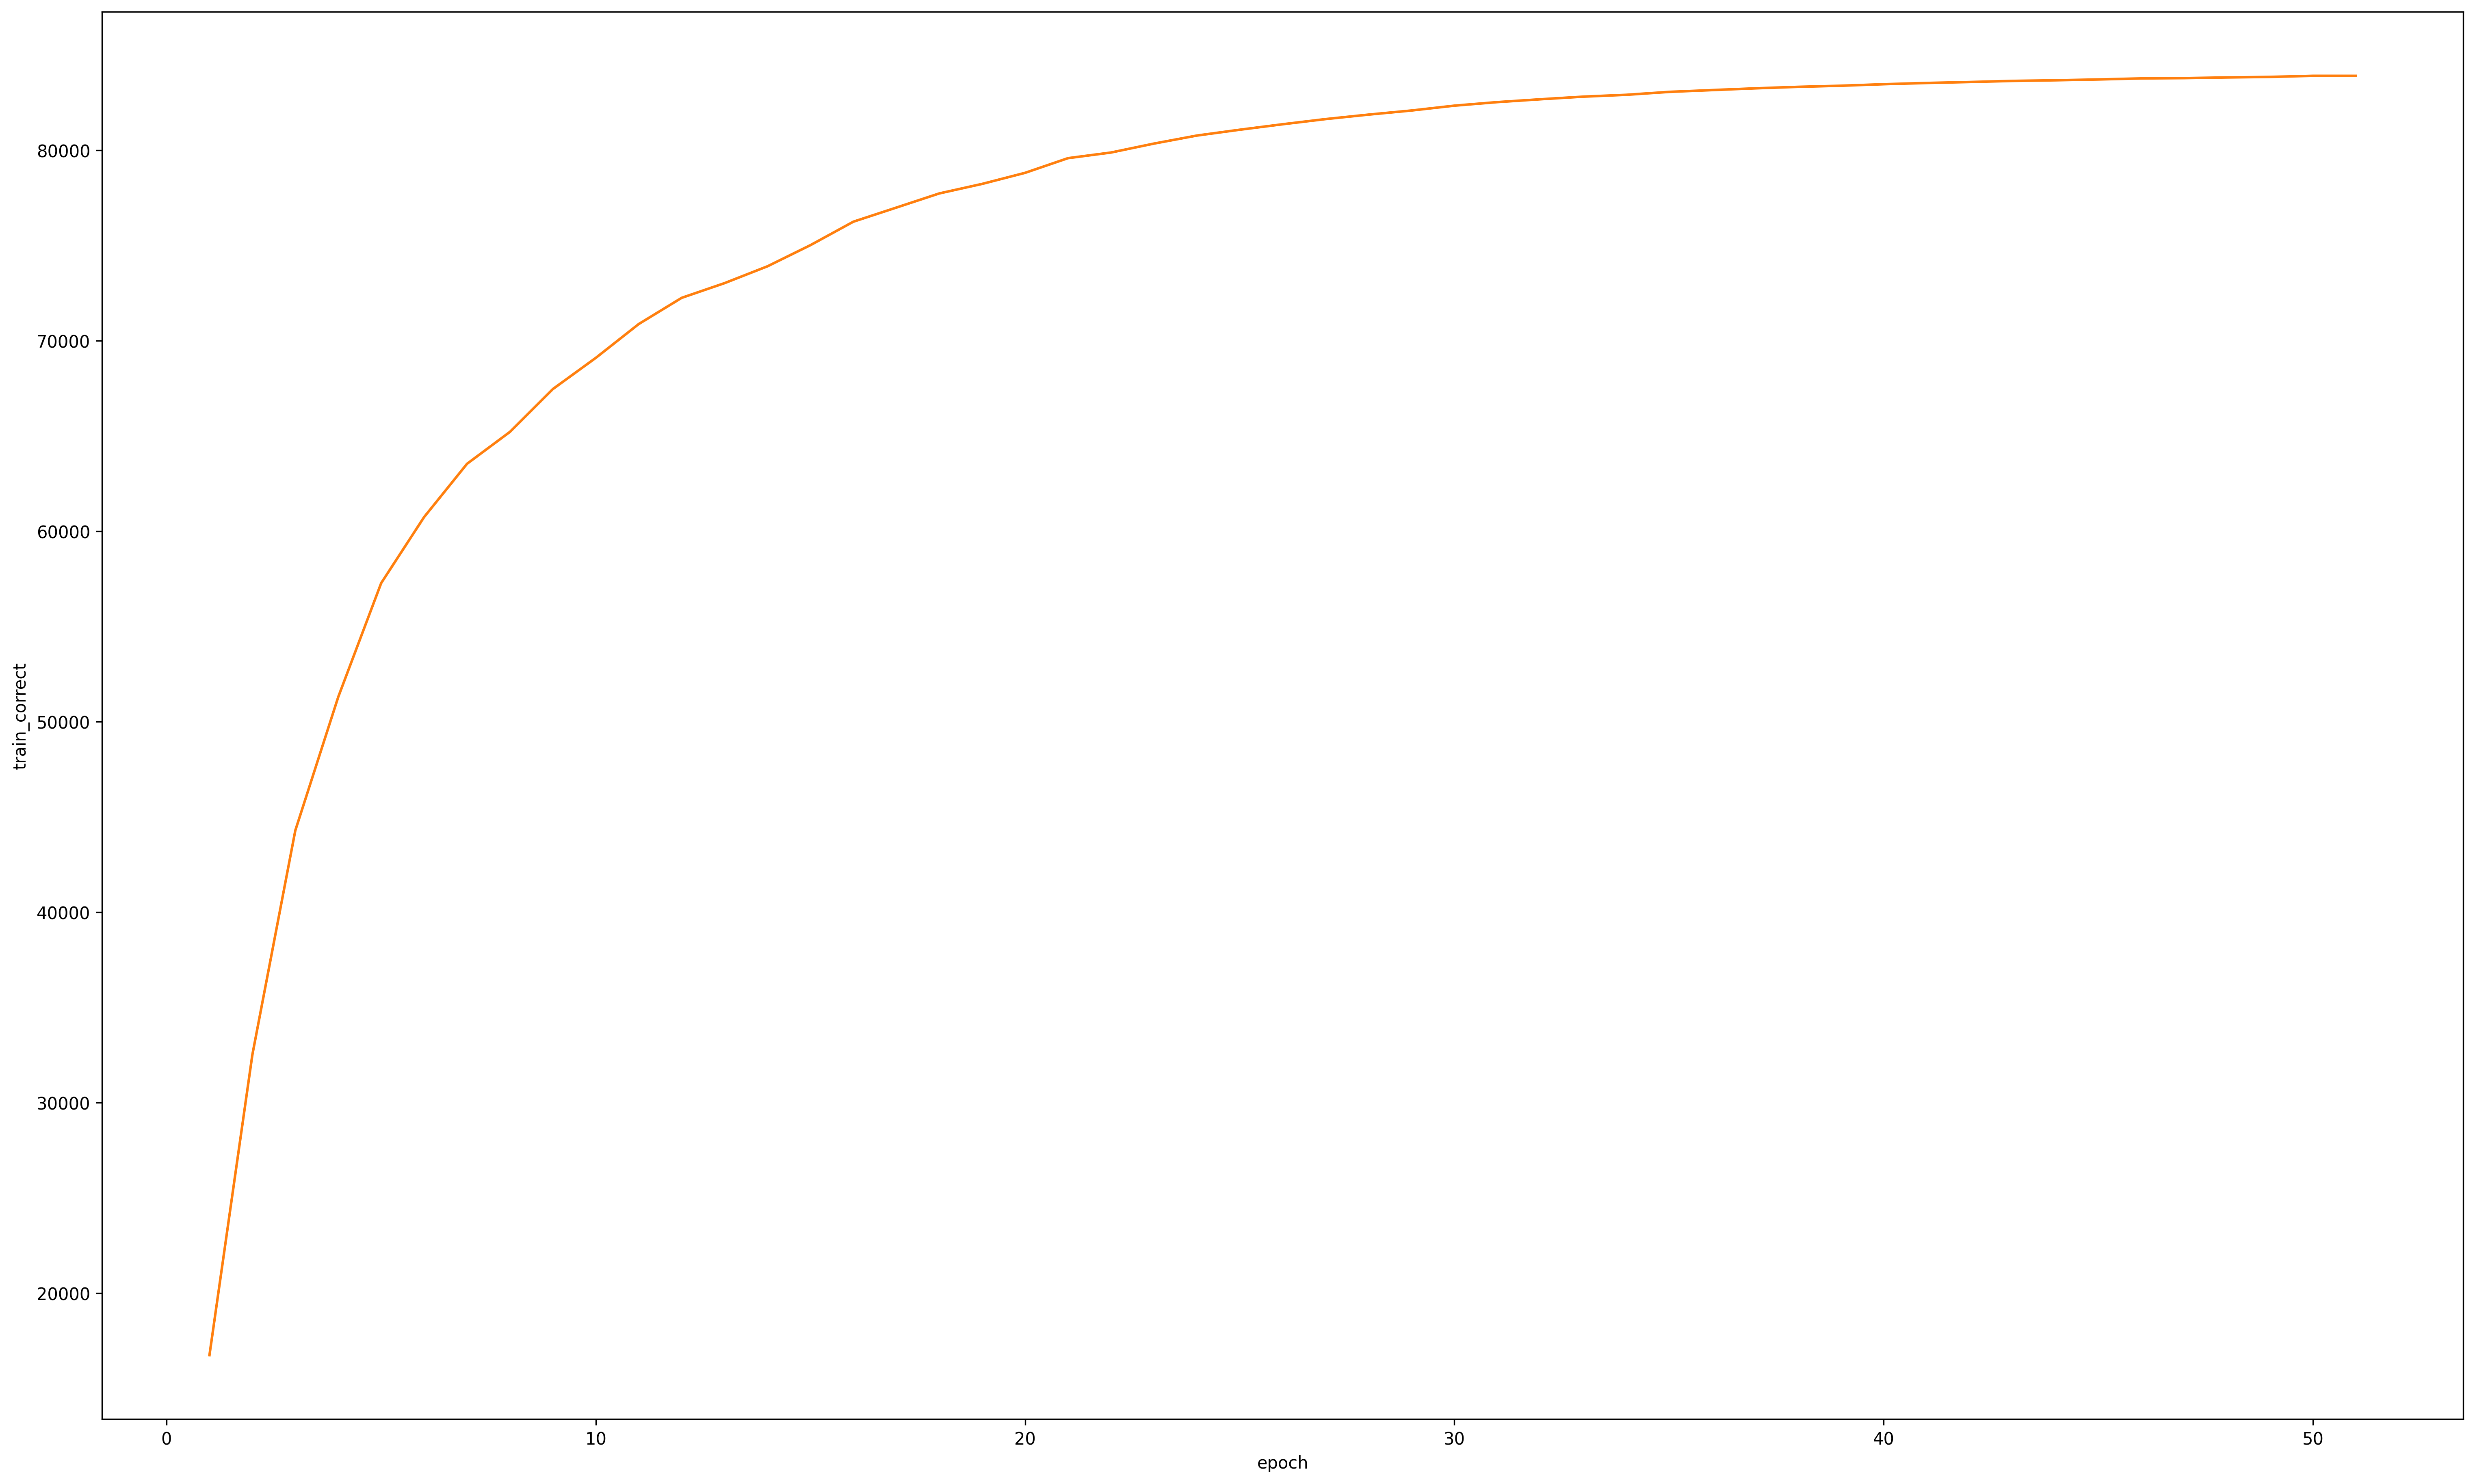

In [10]:
plt.figure(figsize=(25, 15), dpi=300) 
sns.lineplot(x=df_filt['epoch'],y=df_filt['test_correct'],hue=df_filt['params'],legend=None)
plt.show()
plt.figure(figsize=(25, 15), dpi=300) 
sns.lineplot(x=df_filt['epoch'],y=df_best['train_correct'],hue=df_filt['params'],legend=None)
plt.show()

In [11]:
best_params = df[df['test_correct']>8000]['params'].values
worst = df[~df['params'].isin(best_params)]

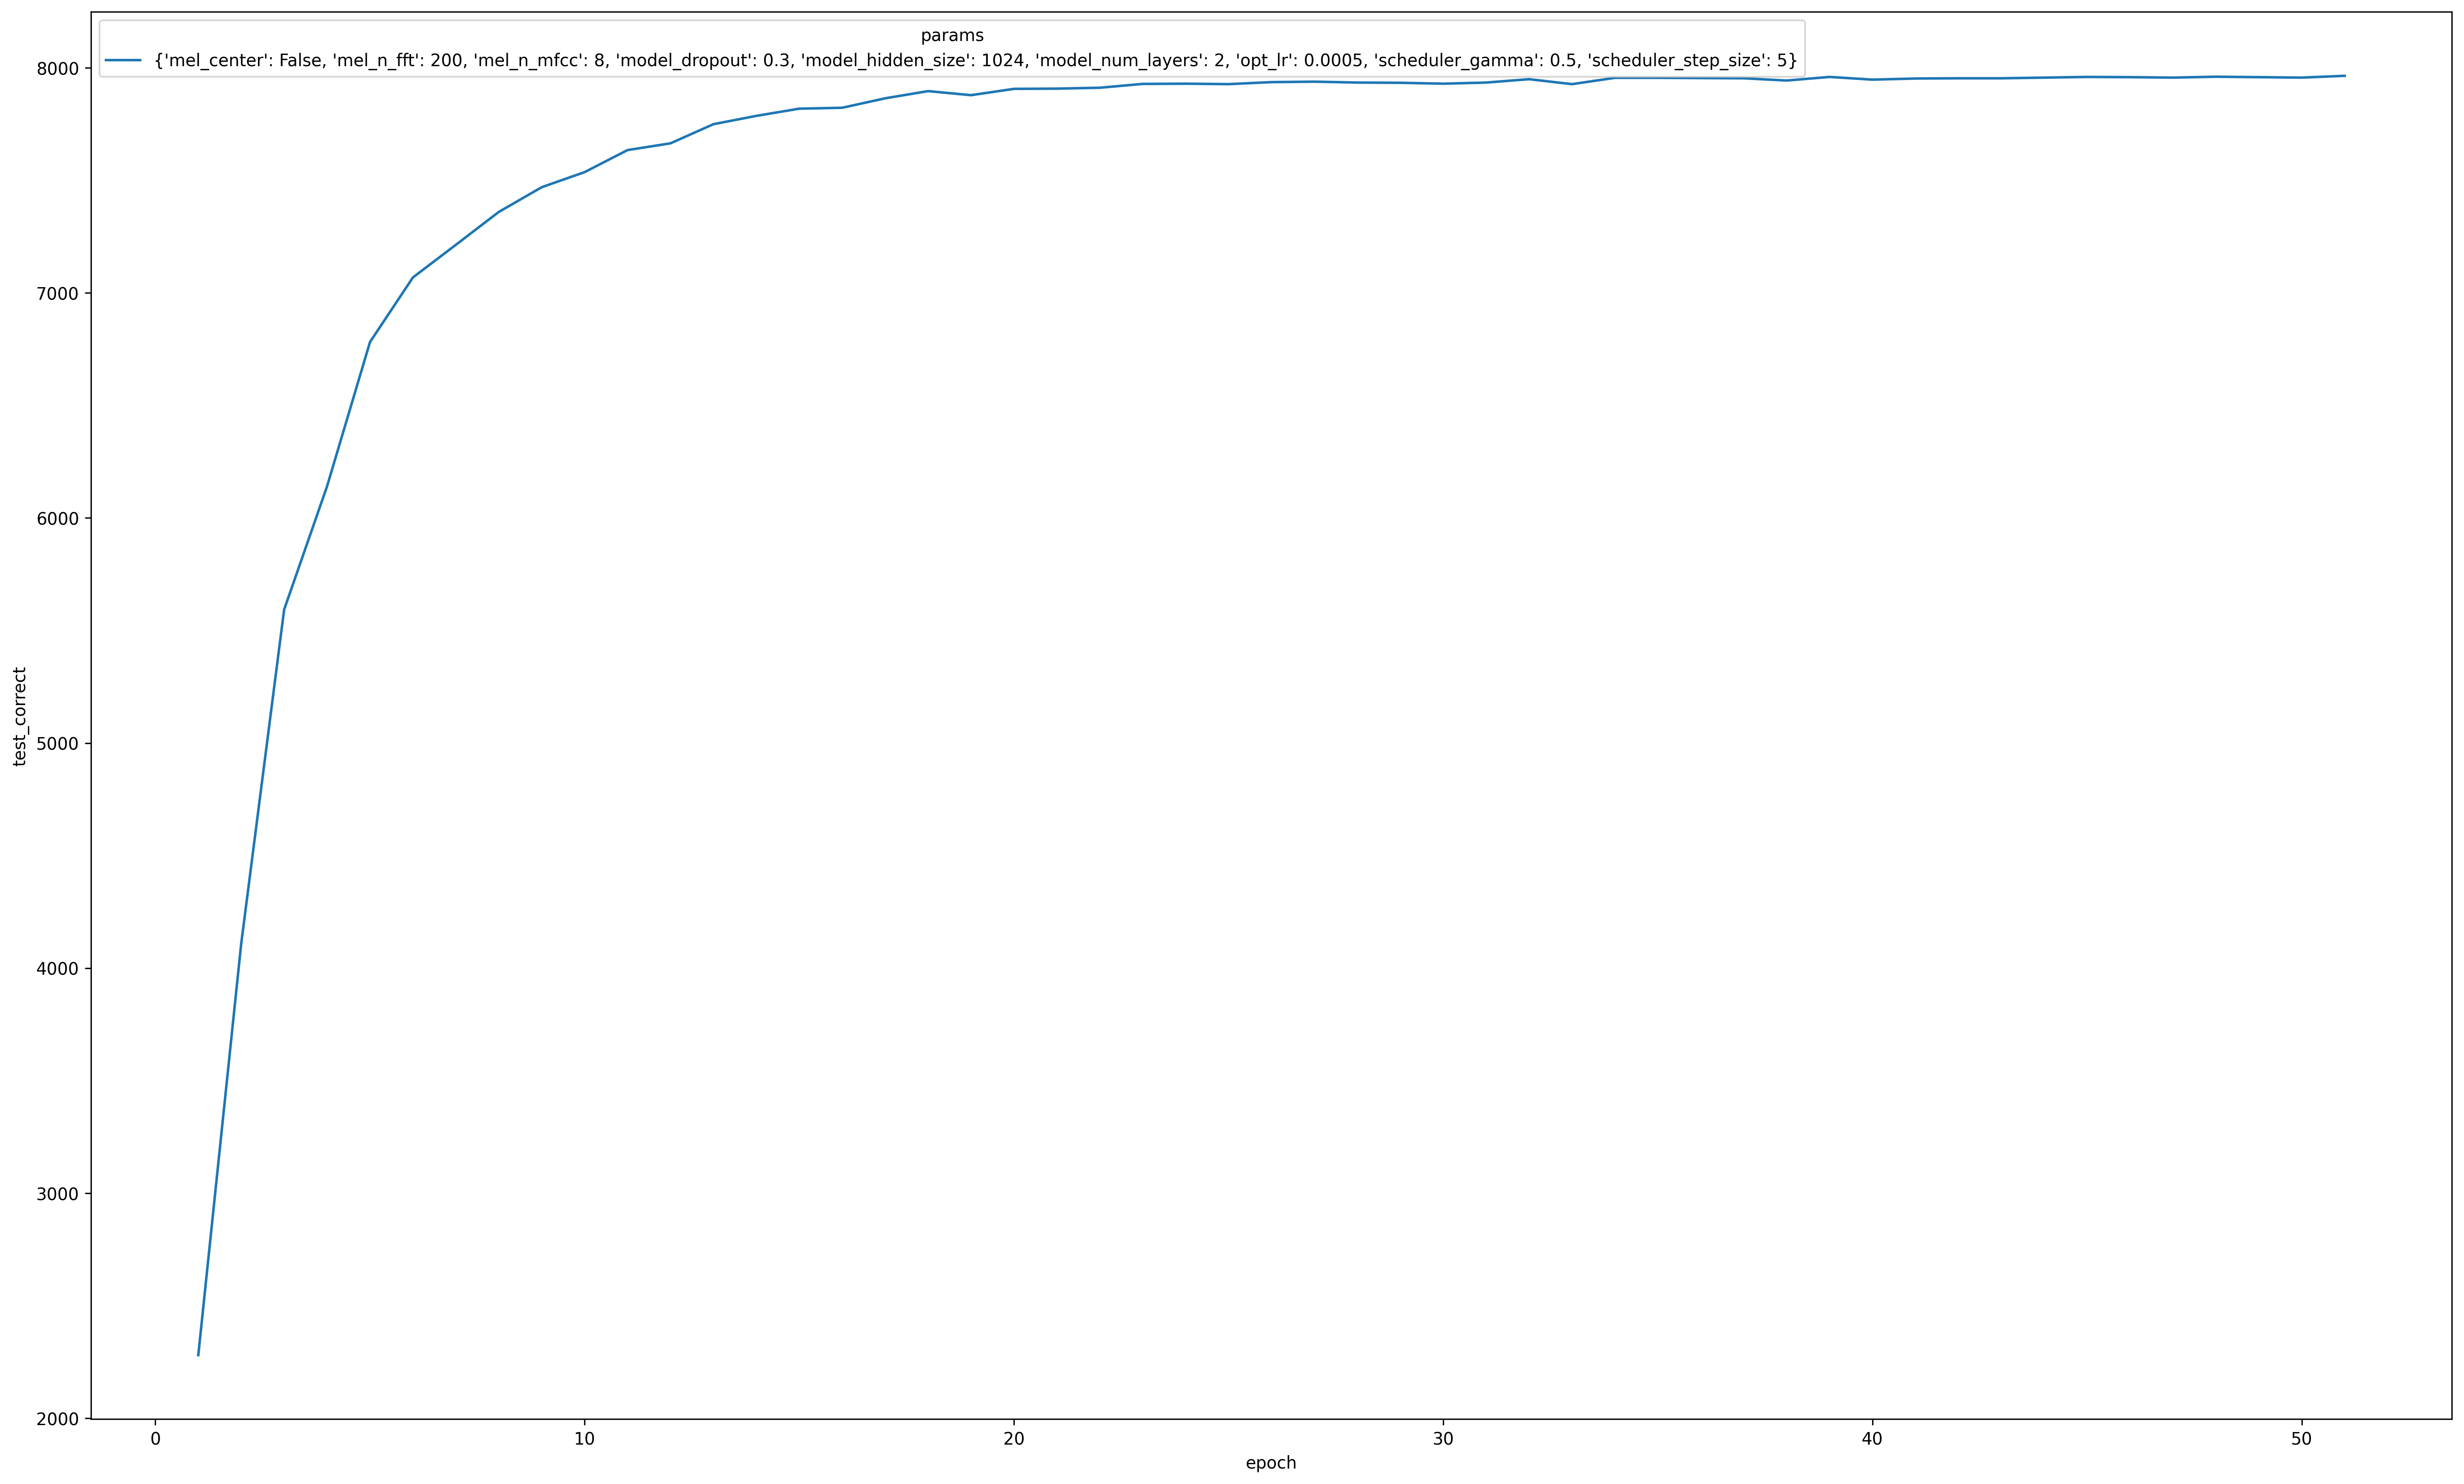

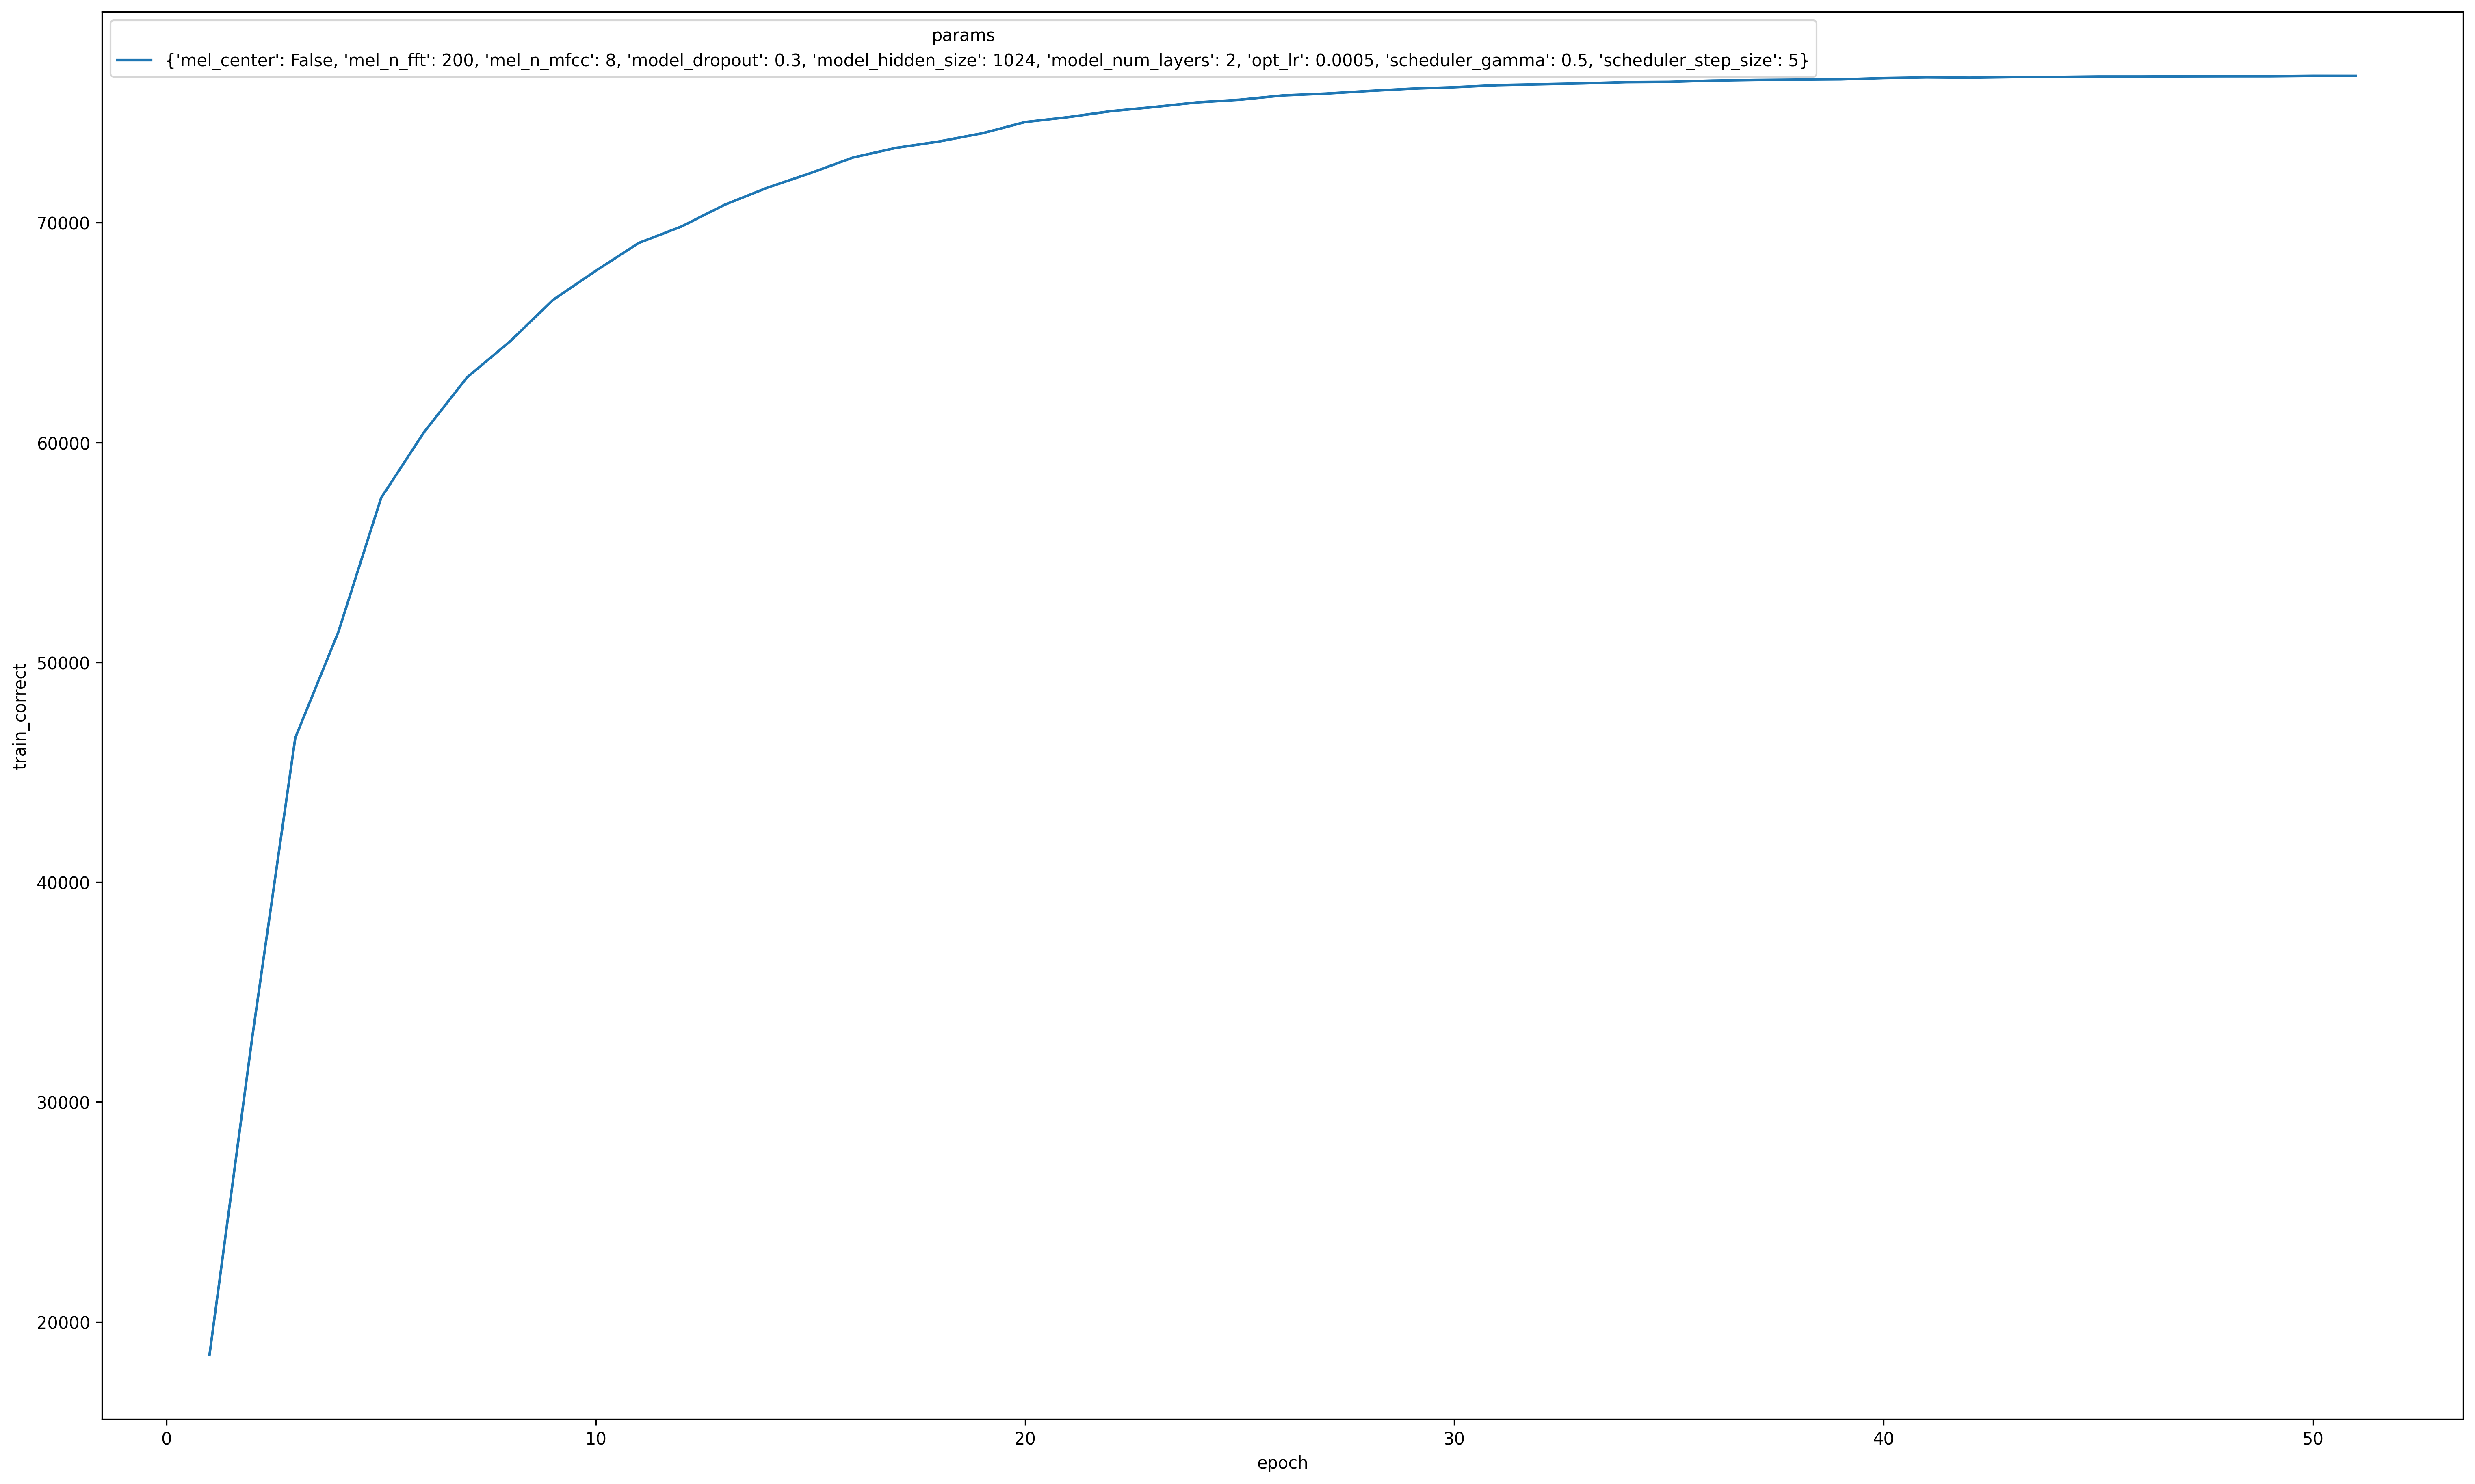

In [12]:
plt.figure(figsize=(25, 15), dpi=300) 
sns.lineplot(x=worst['epoch'],y=worst['test_correct'],hue=worst['params'])
plt.show()
plt.figure(figsize=(25, 15), dpi=300) 
sns.lineplot(x=worst['epoch'],y=worst['train_correct'],hue=worst['params'])
plt.show()